# Revisiting Andrew with HURDAT2 and ERA5 Reanalysis Data
https://www.nhc.noaa.gov/data/#hurdat

https://www.ecmwf.int/en/forecasts/dataset/ecmwf-reanalysis-v5

---

---

# Import ALL the packages.

**We _probably_ don't need all of these, but it's a collection of packages that I import with most of my notebooks at this point. It's kinda' like Pokémon--gotta' catch 'em all!**

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
from datetime import datetime
from metpy import units as units, calc as mpcalc
from cartopy import crs as ccrs, feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt
import requests

---

Here we define a function to convert the lat and lon data to floats. We do this before importing the data so we can use it in the import.

In [2]:
def lat_lon_to_float(v):
    """
    Convert Strings from NHC to float locations.
    """
    if (v[-1] == 'S') or (v[-1] == 'W'):
        multiplier = -1
    else:
        multiplier = 1
    return float(v[:-1]) * multiplier

# Import the DATA!

**We know which columns we want thanks to NOAA's details on the format.**

https://www.nhc.noaa.gov/data/hurdat/hurdat2-format-atl-1851-2021.pdf

In [3]:
data = []
with open('hurdat2-1851-2024-040425.txt', 'r') as f:
    for line in f.readlines():
        if line.startswith('AL'):
            storm_id = line.split(',')
            storm_number = storm_id[0].strip()
            storm_name = storm_id[1].strip()
        else:
            location_line = line.split(',')
            dt = datetime.strptime(location_line[0] + location_line[1], '%Y%m%d %H%M')
            storm_status = location_line[3].strip()
            storm_lat = lat_lon_to_float(location_line[4].strip())
            storm_lon = lat_lon_to_float(location_line[5].strip())
            max_speed = float(location_line[6].strip())
            cent_press = float(location_line[7].strip())
            
            data.append([storm_number, storm_name, storm_status, max_speed, storm_lat, storm_lon, cent_press, dt])

**Now we'll make the data into a Pandas dataframe, selecting the necessary columns of the wider data.**

In [4]:
df = pd.DataFrame(data, columns=['Storm Number', 'Storm Name', 'Storm Status', 'Max Speed', 'Lat', 'Lon','Central Pressure', 'Time'])

# Data go from 1851 to 2024!
**We'll select the year (1992), then we'll select the storm (ANDREW)**

In [5]:
df = df[(df['Time'] > datetime(1992,1,1)) & (df['Time'] < datetime (1993,1,1))]
df = df.drop(df[df['Storm Name'] != 'ANDREW'].index)
df = df.reset_index(drop = True)
df

,Storm Number,Storm Name,Storm Status,Max Speed,Lat,Lon,Central Pressure,Time
0,AL041992,ANDREW,TD,25.0,10.8,-35.5,1010.0,1992-08-16 18:00:00
1,AL041992,ANDREW,TD,30.0,11.2,-37.4,1009.0,1992-08-17 00:00:00
2,AL041992,ANDREW,TD,30.0,11.7,-39.6,1008.0,1992-08-17 06:00:00
3,AL041992,ANDREW,TS,35.0,12.3,-42.0,1006.0,1992-08-17 12:00:00
4,AL041992,ANDREW,TS,35.0,13.1,-44.2,1003.0,1992-08-17 18:00:00
5,AL041992,ANDREW,TS,40.0,13.6,-46.2,1002.0,1992-08-18 00:00:00
6,AL041992,ANDREW,TS,45.0,14.1,-48.0,1001.0,1992-08-18 06:00:00
7,AL041992,ANDREW,TS,45.0,14.6,-49.9,1000.0,1992-08-18 12:00:00
8,AL041992,ANDREW,TS,45.0,15.4,-51.8,1000.0,1992-08-18 18:00:00
9,AL041992,ANDREW,TS,45.0,16.3,-53.5,1001.0,1992-08-19 00:00:00


**We'll check the shape (because it's easier than counting all the lines ourselves) and see how many data points (with resepct to time) there are.**

In [6]:
df.shape

(52, 8)

In [7]:
Start_Andrew = df.Time[0]
End_Andrew = df.Time[51]

In [8]:
print("Start =  ", Start_Andrew)
print('End =  ', End_Andrew)

Start =   1992-08-16 18:00:00
End =   1992-08-28 06:00:00


**Breaking down to 6hr windows...**

In [9]:
totalTime = End_Andrew - Start_Andrew

In [10]:
totalTime

Timedelta('11 days 12:00:00')

In [11]:
totalHours = (11*24) + 12

In [12]:
hour6 = totalHours/6
hour6

46.0

**Looks like we've got 46 6-hour intervals, so we should have 46 frames for our entire Andrew timeline.**

---

# Let's start getting our data in the correct format.

**NOTE: Wind speed is in knots. Pressure is already in millibars.**

1 knot = 1.15078 mph

Let's define that as a function

In [13]:
def k_mph(v):
    
    conversion = 1.15078
    
    return float(v)*conversion    

In [14]:
df['Max Speed (mph)'] = df['Max Speed'].apply(k_mph)

**Quick check...**

In [15]:
print('Min Max Speed: ', df['Max Speed'].min(), ' (knots)')
print('Max Speed: ', df['Max Speed'].max(), ' (knots)')
print('Min Max Speed: ', df['Max Speed (mph)'].min(), ' (mph)')
print('Max Speed: ', df['Max Speed (mph)'].max(), ' (mph)')

Min Max Speed:  20.0  (knots)
Max Speed:  150.0  (knots)
Min Max Speed:  23.0156  (mph)
Max Speed:  172.617  (mph)


**(Pressure is in millibars, which is how Hurricanes are typically reported. No conversion is needed)**

---

# We have positional data, wind speed, pressure, and time. We can plot our hurricane on a map easily.

**We'll use PlateCarree because LambertConformal won't let me label gridlines.**

**First, we'll determine the map extent.**

In [16]:
print('Furthest West: ', df.Lon.min())
print('Furthest East: ', df.Lon.max())
print('Furthest South: ', df.Lat.min())
print('Furthest North: ', df.Lat.max())

Furthest West:  -91.7
Furthest East:  -35.5
Furthest South:  10.8
Furthest North:  35.4


**A bit bigger so we have a clearer view...**

In [17]:
lonW = -96
lonE = -30
latS = 10
latN = 37.5

extent = [lonW, lonE, latS, latN]

#Projection etc...
PC = ccrs.PlateCarree()
res = '50m'

---

**We need to convert start and end to strings for the datetime printout.**

In [18]:
Begin = Start_Andrew.strftime('%m-%d %H:%M')
End = End_Andrew.strftime('%m-%d %H:%M')

In [19]:
# Create a custom date formatter to display the full datetime
date_format = mdates.DateFormatter('%m-%d %H:%M')

**Now we set up 6-hr increments...**

In [20]:
GOtime = Start_Andrew

while GOtime <= End_Andrew:
    # Grab the nearest timestamp to 'GOtime'
    this_time = df.iloc[(df['Time'] - GOtime).abs().idxmin()]
    
    time = this_time['Time']
    wind = this_time['Max Speed (mph)']
    press = this_time['Central Pressure']
    lat = this_time['Lat']
    lon = this_time['Lon']
    
    print(time, wind, press, lat, lon)
    # Increment the current time by 6 hours
    GOtime += pd.Timedelta(hours=6)

1992-08-16 18:00:00 28.769499999999997 1010.0 10.8 -35.5
1992-08-17 00:00:00 34.523399999999995 1009.0 11.2 -37.4
1992-08-17 06:00:00 34.523399999999995 1008.0 11.7 -39.6
1992-08-17 12:00:00 40.2773 1006.0 12.3 -42.0
1992-08-17 18:00:00 40.2773 1003.0 13.1 -44.2
1992-08-18 00:00:00 46.0312 1002.0 13.6 -46.2
1992-08-18 06:00:00 51.78509999999999 1001.0 14.1 -48.0
1992-08-18 12:00:00 51.78509999999999 1000.0 14.6 -49.9
1992-08-18 18:00:00 51.78509999999999 1000.0 15.4 -51.8
1992-08-19 00:00:00 51.78509999999999 1001.0 16.3 -53.5
1992-08-19 06:00:00 51.78509999999999 1002.0 17.2 -55.3
1992-08-19 12:00:00 51.78509999999999 1005.0 18.0 -56.9
1992-08-19 18:00:00 51.78509999999999 1007.0 18.8 -58.3
1992-08-20 00:00:00 46.0312 1011.0 19.8 -59.3
1992-08-20 06:00:00 46.0312 1013.0 20.7 -60.0
1992-08-20 12:00:00 46.0312 1015.0 21.7 -60.7
1992-08-20 18:00:00 46.0312 1014.0 22.5 -61.5
1992-08-21 00:00:00 51.78509999999999 1014.0 23.2 -62.4
1992-08-21 06:00:00 51.78509999999999 1010.0 23.9 -63.3
199

---

# Loop through the data and plot our frames...

**We also want to highlight storm status.**

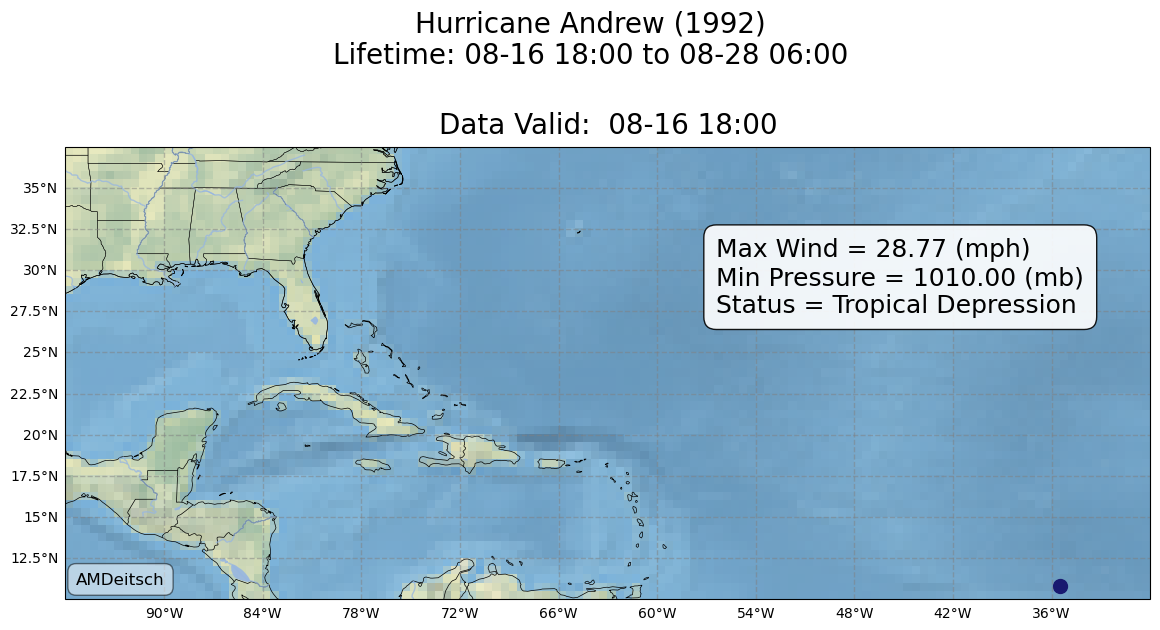

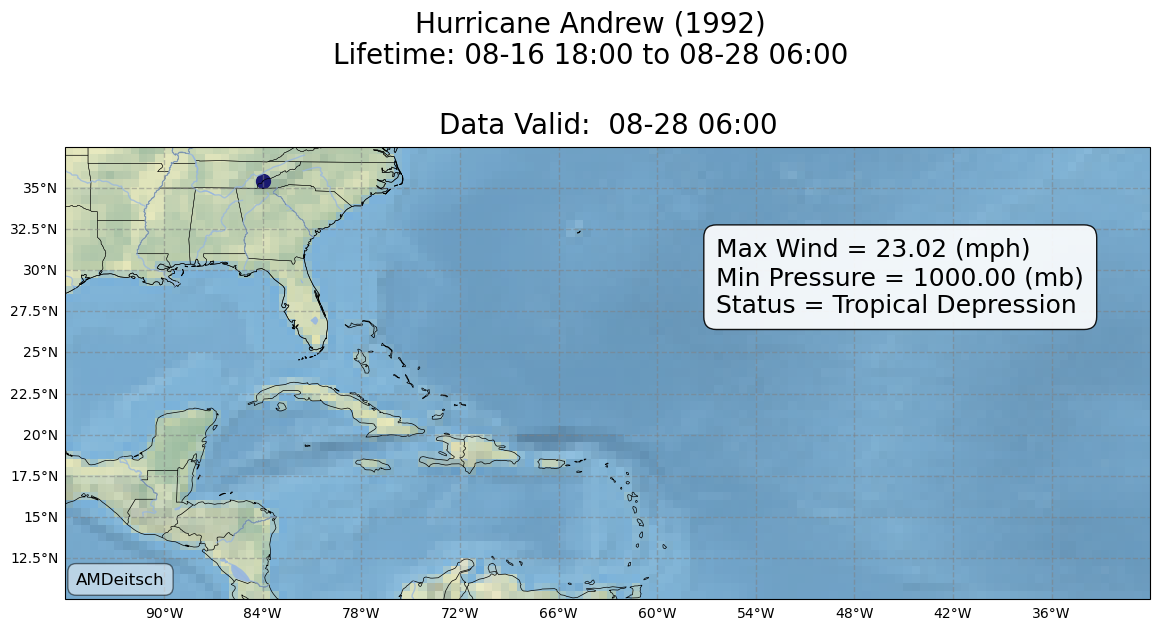

In [21]:
GOtime = Start_Andrew

while GOtime <= End_Andrew:
    # Grab the nearest timestamp to 'GOtime'
    this_time = df.iloc[(df['Time'] - GOtime).abs().idxmin()]
    
    time = this_time['Time']
    wind = this_time['Max Speed (mph)']
    press = this_time['Central Pressure']
    lat = this_time['Lat']
    lon = this_time['Lon']

    # Determine the storm status based on max wind speed
    if wind < 39:
        Status = 'Tropical Depression'
    elif 39 <= wind <= 73:
        Status = 'Tropical Storm'
    elif 74 <= wind <= 95:
        Status = 'Category 1 Hurricane'
    elif 96 <= wind <= 110:
        Status = 'Category 2 Hurricane'
    elif 111 <= wind <= 129:
        Status = 'Category 3 Hurricane'
    elif 130 <= wind <= 156:
        Status = 'Category 4 Hurricane'
    elif wind >= 157:
        Status = 'Category 5 Hurricane'
    
    
    fig = plt.figure(figsize=(14,8))
    widths = [7]
    heights = [7]#, 5, 1]
    spec = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths,
                                          height_ratios=heights)

    # Let's add a supertitle.
    fig.suptitle(f'Hurricane Andrew (1992)\nLifetime: {Begin} to {End}', y = .95, fontsize = 20)

    ax1 = fig.add_subplot(spec[0,0], projection= PC)

    gl1 = ax1.gridlines(PC, draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl1.xlocator = plt.MaxNLocator(12) 
    gl1.ylocator = plt.MaxNLocator(12) 
    gl1.xlabel_style = {'size': 10}  
    gl1.ylabel_style = {'size': 10} 


    ax1.set_extent(extent, PC)

    valid = time.strftime('%m-%d %H:%M')

    # Let's try and set the title to reflect the datetime of the plot.
    ax1.set_title(f'Data Valid:  {valid}', linespacing = 1.75, pad = 10, fontsize=20)


    # Define the background and outlines
    ax1.stock_img()
    ax1.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black')
    ax1.add_feature(cfeature.STATES, linewidth=0.3, edgecolor="black")
    ax1.add_feature(cfeature.COASTLINE, linewidth = 0.5, edgecolor = 'black')
    ax1.add_feature(cfeature.LAKES, alpha= .9)
    ax1.add_feature(cfeature.RIVERS, alpha =0.75)

    # Plot the data for our storm

    ax1.scatter(lon, lat, s=100, color = 'midnightblue', label = 'Central Location', marker = 'o')

    # Define data for text box that meets requirements of assignmnet
        # Showing Wind Speed and Pressure with each 6h mark.

    max_speed = wind
    WStext = f'Max Wind = {max_speed:.2f} (mph)'

    min_pres = press
    MBtext = f'Min Pressure = {min_pres:.2f} (mb)'

    Statustext = 'Status = ' + Status

    props = dict(boxstyle='round', facecolor='white', alpha=0.9, pad = 0.5)
    props2 = dict(boxstyle='round', facecolor='white', alpha=0.5, pad = 0.5)


    # place the text box in our empty space
    ax1.text(0.6, 0.8, f'{WStext}\n{MBtext}\n{Statustext}', transform=ax1.transAxes, fontsize=18, verticalalignment='top', bbox=props)
    ax1.text(0.01, 0.06, 'AMDeitsch', transform=ax1.transAxes, fontsize=12, verticalalignment='top', bbox=props2)
    #hide extra axes...
    gl1.top_labels = False
    gl1.right_labels = False
    
    save = time.strftime('%Y%m%d%H')
    
    if GOtime == Start_Andrew or GOtime == End_Andrew:
        plt.show()
    else:
        plt.close(fig)
    # Increment the current time by 6 hours
    GOtime += pd.Timedelta(hours=6)

---

# We also want SST and MSLP

We'll import the ERA5 data from the Thredds Server

We know which because...

https://confluence.ecmwf.int/display/CKB/ERA5%3A+data+documentation#ERA5:datadocumentation-Introduction

In [22]:
SST = 'https://thredds.rda.ucar.edu/thredds/dodsC/files/g/d633000/e5.oper.an.sfc/199208/e5.oper.an.sfc.128_034_sstk.ll025sc.1992080100_1992083123.nc'
SLP = 'https://thredds.rda.ucar.edu/thredds/dodsC/files/g/d633000/e5.oper.an.sfc/199208/e5.oper.an.sfc.128_151_msl.ll025sc.1992080100_1992083123.nc'

Now we'll use xarray to open the datasets (NetCDF and such.)

In [23]:
slp = xr.open_dataset(SLP)
sst = xr.open_dataset(SST)

**Note: MSL is in Pa, SST is in K**

In [24]:
slp['MSL']

<xarray.DataArray 'MSL' (time: 744, latitude: 721, longitude: 1440)>
[772450560 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * time       (time) datetime64[ns] 1992-08-01 ... 1992-08-31T23:00:00
Attributes: (12/15)
    long_name:                     Mean sea level pressure
    short_name:                    msl
    units:                         Pa
    original_format:               WMO GRIB 1 with ECMWF local table
    ecmwf_local_table:             128
    ecmwf_parameter:               151
    ...                            ...
    rda_dataset:                   ds633.0
    rda_dataset_url:               https:/rda.ucar.edu/datasets/ds633.0/
    rda_dataset_doi:               DOI: 10.5065/BH6N-5N20
    rda_dataset_group:             ERA5 atmospheric surface analysis [netCDF4]
    number_of_significant_digits:  7
    _ChunkSizes:                   [ 27 139 277]

In [25]:
sst['SSTK']

<xarray.DataArray 'SSTK' (time: 744, latitude: 721, longitude: 1440)>
[772450560 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * time       (time) datetime64[ns] 1992-08-01 ... 1992-08-31T23:00:00
Attributes: (12/15)
    long_name:                     Sea surface temperature
    short_name:                    sstk
    units:                         K
    original_format:               WMO GRIB 1 with ECMWF local table
    ecmwf_local_table:             128
    ecmwf_parameter:               34
    ...                            ...
    rda_dataset:                   ds633.0
    rda_dataset_url:               https:/rda.ucar.edu/datasets/ds633.0/
    rda_dataset_doi:               DOI: 10.5065/BH6N-5N20
    rda_dataset_group:             ERA5 atmospheric surface analysis [netCDF4]
    number_of_significant_digits:  7
    _ChunkSizes:                   [ 27 139 277]

---

# Define our contour intervals

In [26]:
minP = 900
maxP = 1080
Pint = 4
SLPcintervals = np.arange(minP, maxP, Pint)
SLPcintervals

array([ 900,  904,  908,  912,  916,  920,  924,  928,  932,  936,  940,
        944,  948,  952,  956,  960,  964,  968,  972,  976,  980,  984,
        988,  992,  996, 1000, 1004, 1008, 1012, 1016, 1020, 1024, 1028,
       1032, 1036, 1040, 1044, 1048, 1052, 1056, 1060, 1064, 1068, 1072,
       1076])

In [27]:
minT = 20
maxT = 36
Tint = 2
SSTcintervals = np.arange(minT, maxT, Tint)
SSTcintervals

array([20, 22, 24, 26, 28, 30, 32, 34])

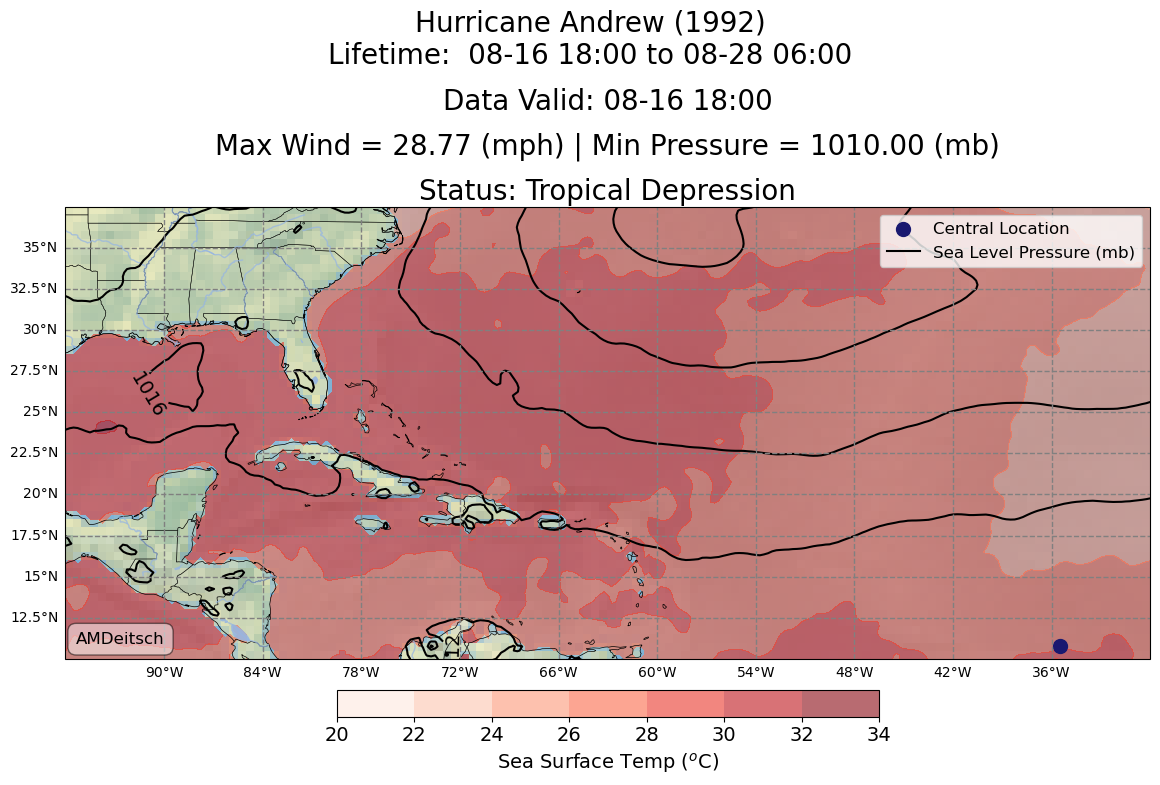

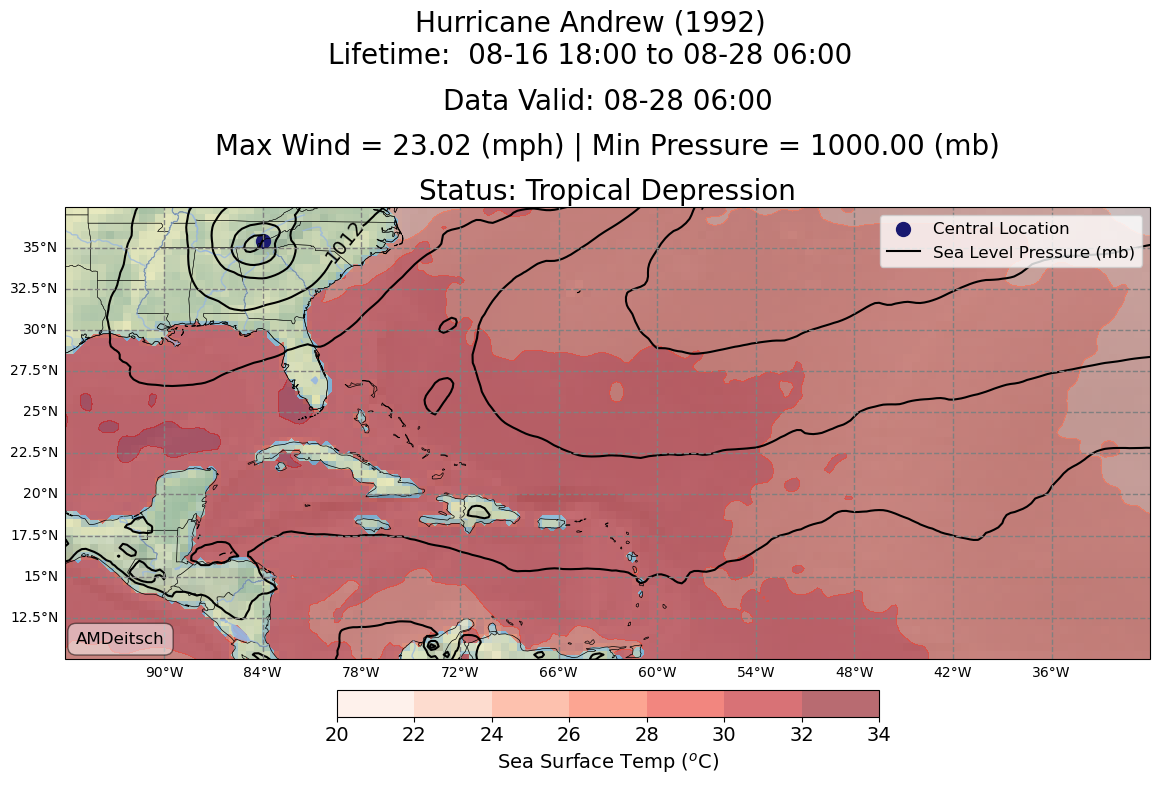

In [28]:
GOtime = Start_Andrew

while GOtime <= End_Andrew:
    # Grab the nearest timestamp to 'GOtime'
    this_time = df.iloc[(df['Time'] - GOtime).abs().idxmin()]
    
    time = this_time['Time']
    #print(time)
    wind = this_time['Max Speed (mph)']
    #print(wind)
    press = this_time['Central Pressure']
    #print(press)
    lat = this_time['Lat']
    #print(lat)
    lon = this_time['Lon']
    #print(lon)

     # Extract year, month, day, minute, and second from 'time'
    year = time.year
    month = time.month
    day = time.day
    hour = time.hour
    minute = time.minute
    second = time.second
    
    dateTime = datetime(year,month,day, hour, minute)    

    # Determine the storm status based on max wind speed
    if wind < 39:
        Status = 'Tropical Depression'
    elif 39 <= wind <= 73:
        Status = 'Tropical Storm'
    elif 74 <= wind <= 95:
        Status = 'Category 1 Hurricane'
    elif 96 <= wind <= 110:
        Status = 'Category 2 Hurricane'
    elif 111 <= wind <= 129:
        Status = 'Category 3 Hurricane'
    elif 130 <= wind <= 156:
        Status = 'Category 4 Hurricane'
    elif wind >= 157:
        Status = 'Category 5 Hurricane'
    
    
    
    #Define Figure
    fig = plt.figure(figsize=(14,8))#,dpi = 300
    widths = [7]
    heights = [7]#, 5, 1]
    spec = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths,
                                          height_ratios=heights)

    # Let's add a supertitle.
    fig.suptitle(f'Hurricane Andrew (1992)\nLifetime:  {Begin} to {End}\n', y = 1.075, fontsize = 20)

    ax1 = fig.add_subplot(spec[0,0], projection= PC)

    gl1 = ax1.gridlines(PC, draw_labels=True, linewidth=1, color='gray', alpha=1, linestyle='--')
    gl1.xlocator = plt.MaxNLocator(12) 
    gl1.ylocator = plt.MaxNLocator(12) 
    gl1.xlabel_style = {'size': 10}  
    gl1.ylabel_style = {'size': 10} 


    ax1.set_extent(extent, PC)
    
    
    valid = time.strftime('%m-%d %H:%M')

    # Define the background and outlines
    ax1.stock_img()
    ax1.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black')
    ax1.add_feature(cfeature.STATES, linewidth=0.3, edgecolor="black")
    ax1.add_feature(cfeature.COASTLINE, linewidth = 0.5, edgecolor = 'black')
    ax1.add_feature(cfeature.LAKES, alpha= .9)
    ax1.add_feature(cfeature.RIVERS, alpha =0.75)

    
    sst_data = sst.sel(time=dateTime, method = 'nearest')
    sst_data['SSTK'] = sst_data['SSTK'].metpy.convert_units('degC')
    #print(sst_data)
    
    CL = ax1.contourf(sst_data['longitude'], sst_data['latitude'], sst_data['SSTK'], levels=SSTcintervals, cmap=plt.get_cmap('Reds'), transform=PC, alpha = .6)
    cbar = plt.colorbar(CL, shrink = .5, location = 'bottom', pad = .05)
    cbar.ax.tick_params(labelsize = 14, )
    cbar.ax.set_xlabel('Sea Surface Temp ($^{o}$C)', fontsize = 14, loc = 'center')
    
    
    slp_data = slp.sel(time=dateTime, method = 'nearest')
    slp_data['MSL'] = slp_data['MSL'].metpy.convert_units('hPa')
    LL = ax1.contour(slp_data['longitude'], slp_data['latitude'], slp_data['MSL'], levels = SLPcintervals, colors = 'black')
    ax1.clabel(LL, inline_spacing = 0, fontsize = 14, fmt = '%.0f')

    
    # Plot the data for our storm

    ax1.scatter(lon, lat, s=100, color = 'midnightblue', label = 'Central Location', marker = 'o')

    # Define data for text box that meets requirements of assignmnet
        # Showing Wind Speed and Pressure with each 6h mark.

    max_speed = wind
    WStext = f'Max Wind = {max_speed:.2f} (mph)'

    min_pres = press
    MBtext = f'Min Pressure = {min_pres:.2f} (mb)'

    props = dict(boxstyle='round', facecolor='white', alpha=0.9, pad = 0.5)
    props2 = dict(boxstyle='round', facecolor='white', alpha=0.5, pad = 0.5)

    # Set the title to reflect the datetime of the plot.
    ax1.set_title(f'Data Valid: {valid}\n{WStext} | {MBtext}\nStatus: {Status}', linespacing = 1.75, pad = 5, fontsize=20)
    ax1.text(0.01, 0.06, 'AMDeitsch', transform=ax1.transAxes, fontsize=12, verticalalignment='top', bbox=props2)
    
    # Hide extra axes...
    gl1.top_labels = False
    gl1.right_labels = False
    
    save = time.strftime('%Y%m%d%H')
    
    # Create a dummy plot so the SLP contour is in the legend
    ax1.plot([], [], label='Sea Level Pressure (mb)', color='black')
    
    ax1.legend(loc = 'upper right', fontsize = 12)
    plt.savefig('Maps/Andrew_' + save + '.png', dpi=500, bbox_inches='tight')
    
    if GOtime == Start_Andrew or GOtime == End_Andrew:
        plt.show()
    else:
        plt.close(fig)
    
    # Increment the current time by 6 hours
    GOtime += pd.Timedelta(hours=6)

# Isolating landfall
**Key landfall times are not fully coveredy by 6-hr resolution.**

In [29]:
landfall_times = [
    pd.Timestamp('1992-08-23 21:00:00'),
    pd.Timestamp('1992-08-24 01:00:00'),
    pd.Timestamp('1992-08-24 08:40:00'),
    pd.Timestamp('1992-08-24 09:05:00'),
    pd.Timestamp('1992-08-26 08:30:00')
]

In [30]:
# Loop through landfall_times and generate plots for each
for landfall_time in landfall_times:
    # Grab the nearest timestamp to 'landfall_time'
    this_time = df.iloc[(df['Time'] - landfall_time).abs().idxmin()]
    
    time = this_time['Time']
    wind = this_time['Max Speed (mph)']
    press = this_time['Central Pressure']
    lat = this_time['Lat']
    lon = this_time['Lon']

    # Extract year, month, day, hour, minute, and second from 'time'
    year = time.year
    month = time.month
    day = time.day
    hour = time.hour
    minute = time.minute
    second = time.second
    
    dateTime = datetime(year, month, day, hour, minute)    

    # Determine the storm status based on max wind speed
    if wind < 39:
        Status = 'Tropical Depression'
    elif 39 <= wind <= 73:
        Status = 'Tropical Storm'
    elif 74 <= wind <= 95:
        Status = 'Category 1 Hurricane'
    elif 96 <= wind <= 110:
        Status = 'Category 2 Hurricane'
    elif 111 <= wind <= 129:
        Status = 'Category 3 Hurricane'
    elif 130 <= wind <= 156:
        Status = 'Category 4 Hurricane'
    elif wind >= 157:
        Status = 'Category 5 Hurricane'
    
    # Define Figure
    fig = plt.figure(figsize=(14,8))#, dpi=300
    widths = [7]
    heights = [7]
    spec = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)

    # Let's add a supertitle
    fig.suptitle(f'Hurricane Andrew (1992)\nLifetime: {Begin} to {End}\n', y=1.075, fontsize=20)

    ax1 = fig.add_subplot(spec[0,0], projection=PC)

    gl1 = ax1.gridlines(PC, draw_labels=True, linewidth=1, color='gray', alpha=1, linestyle='--')
    gl1.xlocator = plt.MaxNLocator(12) 
    gl1.ylocator = plt.MaxNLocator(12) 
    gl1.xlabel_style = {'size': 10}  
    gl1.ylabel_style = {'size': 10} 

    ax1.set_extent(extent, PC)

    valid = time.strftime('%m-%d %H:%M')

    # Define the background and outlines
    ax1.stock_img()
    ax1.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black')
    ax1.add_feature(cfeature.STATES, linewidth=0.3, edgecolor="black")
    ax1.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='black')
    ax1.add_feature(cfeature.LAKES, alpha=0.9)
    ax1.add_feature(cfeature.RIVERS, alpha=0.75)

    # Load Sea Surface Temperature (SST) and plot
    sst_data = sst.sel(time=dateTime, method='nearest')
    sst_data['SSTK'] = sst_data['SSTK'].metpy.convert_units('degC')
    CL = ax1.contourf(sst_data['longitude'], sst_data['latitude'], sst_data['SSTK'], levels=SSTcintervals, cmap=plt.get_cmap('Reds'), transform=PC, alpha=0.6)
    cbar = plt.colorbar(CL, shrink=0.5, location='bottom', pad=0.05)
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_xlabel('Sea Surface Temp ($^{o}$C)', fontsize=14, loc='center')

    # Plot sea level pressure
    slp_data = slp.sel(time=dateTime, method='nearest')
    slp_data['MSL'] = slp_data['MSL'].metpy.convert_units('hPa')
    LL = ax1.contour(slp_data['longitude'], slp_data['latitude'], slp_data['MSL'], levels=SLPcintervals, colors='black')
    ax1.clabel(LL, inline_spacing=0, fontsize=14, fmt='%.0f')

    # Plot the data for the storm's central location
    ax1.scatter(lon, lat, s=100, color='midnightblue', label='Central Location', marker='o')

    # Text box for wind speed and pressure
    WStext = f'Max Wind = {wind:.2f} (mph)'
    MBtext = f'Min Pressure = {press:.2f} (mb)'
    props2 = dict(boxstyle='round', facecolor='white', alpha=0.5, pad=0.5)

    ax1.set_title(f"Data Valid: {valid}\n{WStext} | {MBtext}\nStatus: {Status}", linespacing=1.75, pad=5, fontsize=20)
    ax1.text(0.01, 0.06, 'AMDeitsch', transform=ax1.transAxes, fontsize=12, verticalalignment='top', bbox=props2)

    # Hide extra axes
    gl1.top_labels = False
    gl1.right_labels = False

    # Save the figure
    save = time.strftime('%Y%m%d%H')
    ax1.plot([], [], label='Sea Level Pressure (mb)', color='black')  # Dummy plot for legend
    ax1.legend(loc='upper right', fontsize=12)
    plt.savefig('AndrewLandfall_' + save + '.png', dpi=500, bbox_inches='tight')
    plt.close(fig)

